<a href="https://colab.research.google.com/github/MuhammadTalha944/Detecting-and-Removing-Outlers-from-Dataset/blob/main/Detecting_and_removing_Outlers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import statsmodels as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import preprocessing

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df_cars = pd.read_csv('auto-mpg.csv')

In [3]:
df_cars.head(6)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500


In [4]:
print("############################################")
print("          EXPLORATELY DATA ANALYSIS Start")
print("############################################")
print("############################################")
print("          Info Of the Data Set")
print("############################################")
df_cars.info()

############################################
          EXPLORATELY DATA ANALYSIS Start
############################################
############################################
          Info Of the Data Set
############################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [5]:
 df_cars.horsepower = df_cars.horsepower.str.replace('?','NaN').astype(float) 
 df_cars.horsepower.fillna(df_cars.horsepower.mean(),inplace=True) 

In [6]:
 print("######################################################################") 
 print("          After Cleaning and type covertion in the Data Set") 
 print("######################################################################") 
 df_cars.horsepower = df_cars.horsepower.astype(int)
 df_cars.info()

######################################################################
          After Cleaning and type covertion in the Data Set
######################################################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    int64  
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 28.1+ KB


In [7]:
df_cars['car name']

0      chevrolet chevelle malibu
1              buick skylark 320
2             plymouth satellite
3                  amc rebel sst
4                    ford torino
                 ...            
393              ford mustang gl
394                    vw pickup
395                dodge rampage
396                  ford ranger
397                   chevy s-10
Name: car name, Length: 398, dtype: object

In [8]:
df_cars['car name'] = df_cars['car name'].str.replace('chevroelt|chevrolet|chevy','chevrolet')
df_cars['car name'] = df_cars['car name'].str.replace('maxda|mazda','mazda')
df_cars['car name'] = df_cars['car name'].str.replace('mercedes|mercedes-benz|mercedes benz','mercedes')
df_cars['car name'] = df_cars['car name'].str.replace('toyota|toyouta','toyota')
df_cars['car name'] = df_cars['car name'].str.replace('vokswagen|volkswagen|vw','volkswagen')
df_cars.groupby(['car name']).sum().head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
car name,,,,,,,,
amc ambassador brougham,13.0,8,360.0,175,3821,11.0,73,1
amc ambassador dpl,15.0,8,390.0,190,3850,8.5,70,1
amc ambassador sst,17.0,8,304.0,150,3672,11.5,72,1
amc concord,43.7,10,383.0,180,6213,37.3,158,2
amc concord d/l,18.1,6,258.0,120,3410,15.1,78,1


In [9]:
df_cars.describe().round(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.00,398.00,398.00,398.00,398.00,398.00,398.00,398.00
mean,23.51,5.45,193.43,104.46,2970.42,15.57,76.01,1.57
std,7.82,1.70,104.27,38.20,846.84,2.76,3.70,0.80
min,9.00,3.00,68.00,46.00,1613.00,8.00,70.00,1.00
25%,17.50,4.00,104.25,76.00,2223.75,13.82,73.00,1.00
50%,23.00,4.00,148.50,95.00,2803.50,15.50,76.00,1.00
75%,29.00,8.00,262.00,125.00,3608.00,17.17,79.00,2.00
max,46.60,8.00,455.00,230.00,5140.00,24.80,82.00,3.00


In [10]:
print('Filling missing values in horsepower column')
meanhp = df_cars['horsepower'].mean()
df_cars.horsepower = df_cars.horsepower.fillna(meanhp)

Filling missing values in horsepower column


In [11]:
print("Skewness: %f" %df_cars['mpg'].skew())
print("Kurtosis: %f" %df_cars['mpg'].kurt())

Skewness: 0.457066
Kurtosis: -0.510781


In [12]:
df_cars.origin = df_cars.origin.replace({1: 'america', 2: 'europe', 3: 'asia'})
df_cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,america,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,america,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,america,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,america,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,america,ford torino


In [13]:
cData = pd.get_dummies(df_cars, columns=['origin'])
cData

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,ford torino,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,ford mustang gl,1,0,0
394,44.0,4,97.0,52,2130,24.6,82,volkswagen pickup,0,0,1
395,32.0,4,135.0,84,2295,11.6,82,dodge rampage,1,0,0
396,28.0,4,120.0,79,2625,18.6,82,ford ranger,1,0,0


In [14]:
df_cars = df_cars.drop('car name', axis = 1)


In [30]:
df_cars['acceleration'].skew()

0.27877684462588986

In [ ]:
df_cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,america
1,15.0,8,350.0,165,3693,11.5,70,america
2,18.0,8,318.0,150,3436,11.0,70,america
3,16.0,8,304.0,150,3433,12.0,70,america
4,17.0,8,302.0,140,3449,10.5,70,america


In [15]:
df_cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,america
1,15.0,8,350.0,165,3693,11.5,70,america
2,18.0,8,318.0,150,3436,11.0,70,america
3,16.0,8,304.0,150,3433,12.0,70,america
4,17.0,8,302.0,140,3449,10.5,70,america


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


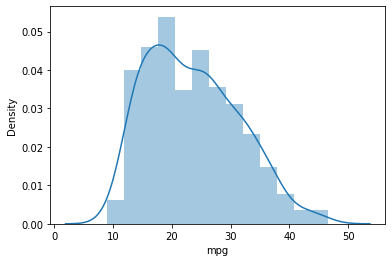

In [16]:
sns_plot = sns.distplot(df_cars["mpg"])

In [31]:
# fig, ax = plt.subplots(1, 1, figsize = (10, 5))
# sns.countplot(x = df_cars.origin.values, data=df_cars)
# labels = [item.get_text() for item in ax.get_xticklabels()]
# labels[0] = 'America'
# labels[1] = 'Europe'
# labels[2] = 'Asia'
# ax.set_xticklabels(labels)
# ax.set_title("Cars manufactured by Countries")
# plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

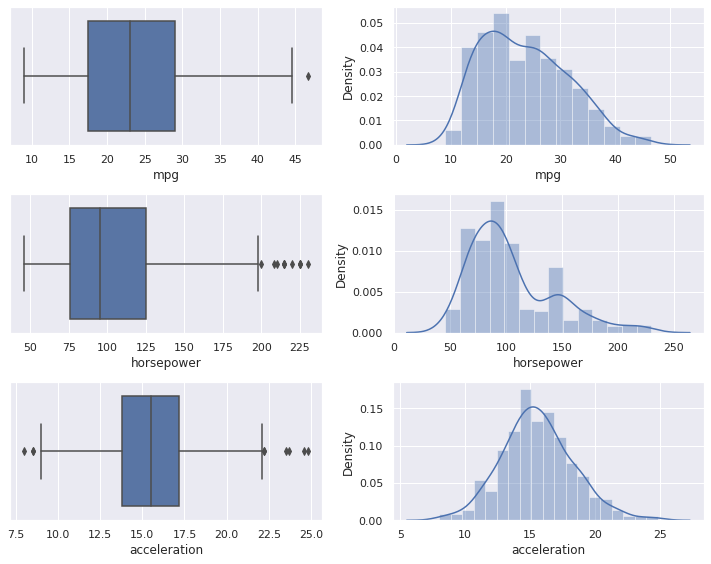

In [39]:
fig, ax = plt.subplots(3, 2, figsize = (10, 8))
sns.boxplot(x= df_cars["mpg"], ax = ax[0,0])
sns.distplot(df_cars['mpg'], ax = ax[0,1])
sns.boxplot(x= df_cars["horsepower"], ax = ax[1,0])
sns.distplot(df_cars['horsepower'], ax = ax[1,1])
sns.boxplot(x= df_cars["acceleration"], ax = ax[2,0])
sns.distplot(df_cars['acceleration'], ax = ax[2,1])
plt.tight_layout()

In [45]:
print('$$$$$$ Removing Outliers  $$$$$')
df_cars['mpg'].skew() , df_cars['horsepower'].skew() , df_cars['acceleration'].skew()

$$$$$$ Removing Outliers  $$$$$


(0.45706634399491913, 1.0961072992303995, 0.27877684462588986)

In [47]:
df_cars['horsepower'].describe()

count    398.000000
mean     104.462312
std       38.199230
min       46.000000
25%       76.000000
50%       95.000000
75%      125.000000
max      230.000000
Name: horsepower, dtype: float64

Box plot of horsepower


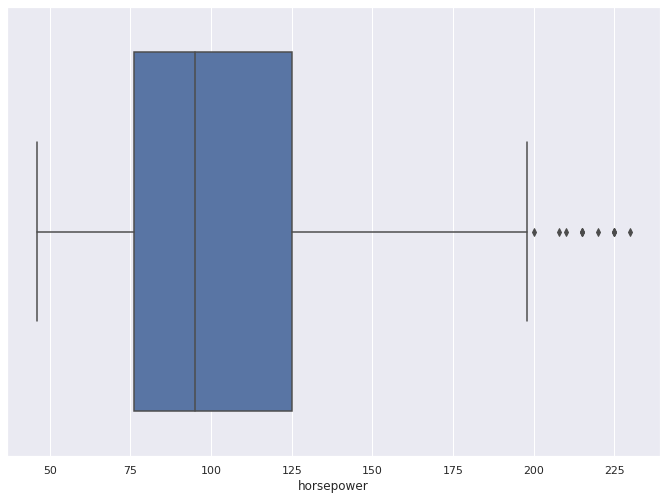

In [48]:
print('Box plot of horsepower')
sns.boxplot(x= df_cars['horsepower'])

In [50]:
print('Finding percentiles')
h_percentile_25 = df_cars['horsepower'].quantile(0.25)
h_percentile_75 = df_cars['horsepower'].quantile(0.75)
h_percentile_25 , h_percentile_75 

calculating IQR


(76.0, 125.0)

In [51]:
print('calculating IQR')
iqr = h_percentile_75 - h_percentile_25
iqr

calculating IQR


49.0

In [53]:
#upper and lower limits
upper_limit = h_percentile_75 + 1.5 * iqr
lower_limit = h_percentile_25 - 1.5 * iqr
print('Upper Limit ', upper_limit)
print('Lower Limit ', lower_limit)

Upper Limit  198.5
Lower Limit  2.5


In [55]:
#Finding outliers
df_cars[df_cars['horsepower'] > upper_limit]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
6,14.0,8,454.0,220,4354,9.0,70,america
7,14.0,8,440.0,215,4312,8.5,70,america
8,14.0,8,455.0,225,4425,10.0,70,america
13,14.0,8,455.0,225,3086,10.0,70,america
25,10.0,8,360.0,215,4615,14.0,70,america
26,10.0,8,307.0,200,4376,15.0,70,america
27,11.0,8,318.0,210,4382,13.5,70,america
67,11.0,8,429.0,208,4633,11.0,72,america
94,13.0,8,440.0,215,4735,11.0,73,america
95,12.0,8,455.0,225,4951,11.0,73,america


In [56]:
#Finding outliers
df_cars[df_cars['horsepower'] > lower_limit]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,america
1,15.0,8,350.0,165,3693,11.5,70,america
2,18.0,8,318.0,150,3436,11.0,70,america
3,16.0,8,304.0,150,3433,12.0,70,america
4,17.0,8,302.0,140,3449,10.5,70,america
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,america
394,44.0,4,97.0,52,2130,24.6,82,europe
395,32.0,4,135.0,84,2295,11.6,82,america
396,28.0,4,120.0,79,2625,18.6,82,america


In [76]:
#Triming mathod to remove outliers
new_df_h = df_cars[df_cars['horsepower'] < upper_limit]
new_df_h.shape , df_cars.shape

((387, 8), (398, 8))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(

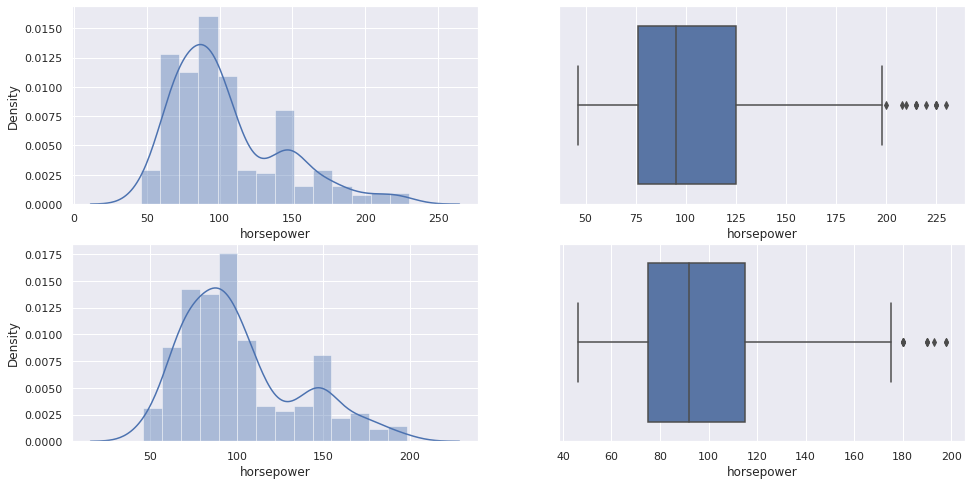

In [77]:
# Comparing Boxplot Before and After removing outlier

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df_cars['horsepower'])

plt.subplot(2,2,2)
sns.boxplot(df_cars['horsepower'])

plt.subplot(2,2,3)
sns.distplot(new_df_h['horsepower'])

plt.subplot(2,2,4)
sns.boxplot(new_df_h['horsepower'])

plt.show()

In [78]:
#Capping for removing outliers
new_df_cap = df_cars.copy()

new_df_cap['horsepower'] = np.where(
    new_df_cap['horsepower'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['horsepower'] < lower_limit,
        lower_limit,
        new_df_cap['horsepower']
    )
)

In [79]:
new_df_cap.shape

(398, 8)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(

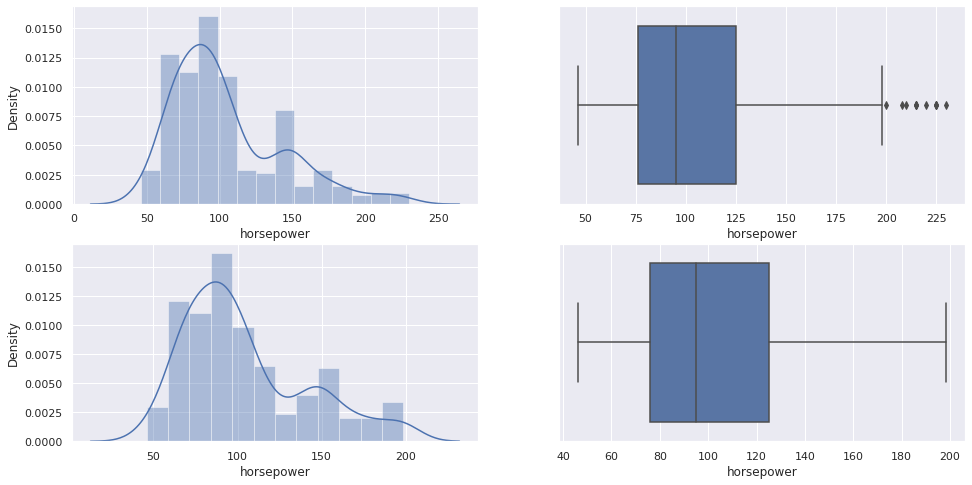

In [80]:
# Comparing Boxplot Before and After removing outlier

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df_cars['horsepower'])

plt.subplot(2,2,2)
sns.boxplot(df_cars['horsepower'])

plt.subplot(2,2,3)
sns.distplot(new_df_cap['horsepower'])

plt.subplot(2,2,4)
sns.boxplot(new_df_cap['horsepower'])

plt.show()

In [83]:
#Converting original horsepower attr to capped horsepwer attr
df_cars[df_cars['horsepower']] = new_df_cap['horsepower']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


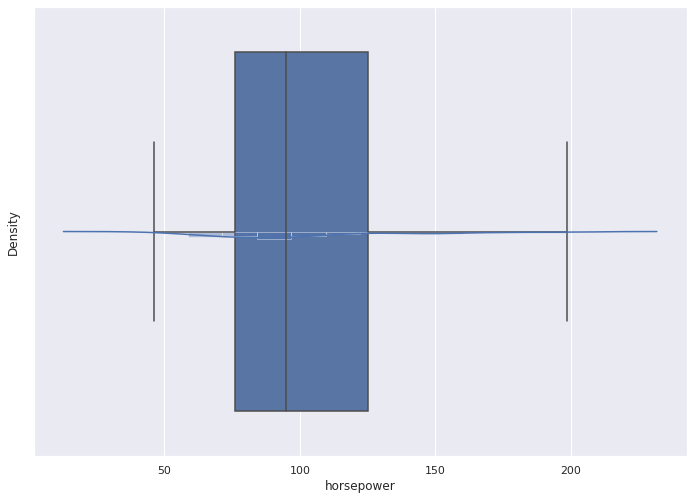

In [85]:
sns.boxplot(x= new_df_cap["horsepower"])
sns.distplot(new_df_cap['horsepower'])

In [40]:

# f,axarr = plt.subplots(4,2, figsize=(10,10))
# mpgval = df_cars.mpg.values
# axarr[0,0].scatter(df_cars.cylinders.values, mpgval)
# axarr[0,0].set_title('Cylinders')
# axarr[0,1].scatter(df_cars.displacement.values, mpgval)
# axarr[0,1].set_title('Displacement')
# axarr[1,0].scatter(df_cars.horsepower.values, mpgval)
# axarr[1,0].set_title('Horsepower')
# axarr[1,1].scatter(df_cars.weight.values, mpgval)
# axarr[1,1].set_title('Weight')
# axarr[2,0].scatter(df_cars.acceleration.values, mpgval)
# axarr[2,0].set_title('Acceleration')
# axarr[2,1].scatter(df_cars["model year"].values, mpgval)
# axarr[2,1].set_title('Model Year')
# axarr[3,0].scatter(df_cars.origin.values, mpgval)
# axarr[3,0].set_title('Country Mpg')
# # Rename x axis label as USA, Europe and Japan
# axarr[3,0].set_xticks([1,2,3])
# axarr[3,0].set_xticklabels(["USA","Europe","Asia"])
# # Remove the blank plot from the subplots
# axarr[3,1].axis("off")
# f.text(-0.01, 0.5, 'Mpg', va='center', rotation='vertical', fontsize = 12)
# plt.tight_layout()
# plt.show()

In [41]:
# sns.set(rc={'figure.figsize':(11.7,8.27)})
# cData_attr = df_cars.iloc[:, 0:7]
# sns.pairplot(cData_attr, diag_kind='kde')   
# to plot density curve instead of the histogram on the diagram # Kernel density estimation(kde)

In [42]:
# df_cars.hist(figsize=(12,8),bins=20)
# plt.show()

In [43]:
# plt.figure(figsize=(10,6))
# sns.heatmap(df_cars.corr(),cmap=plt.cm.Reds,annot=True)
# plt.title('Heatmap displaying the relationship betweennthe features of the data',
#          fontsize=13)
# plt.show()